In [1]:
import pypsa, numpy as np
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import linopy
#import highspy
#h=highspy.Highs()

C:\Apps\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Several Eastern Caribbean countries with  storage and links and hydrogen production as options, one year of hourly periods, with varying loads and generation from VRE 



In [2]:
#choose the working folders for reading in data and for saving output and figures
csv_folder_name =  "Eastern_CaribbeanExtendableLimitedLinksStorageHydrogen/"
network = pypsa.Network(csv_folder_name)
scenario = "LimitedLinksStorageHydrogen-selected_wind_limits_2/"

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network Eastern_CaribbeanExtendableLimitedLinksStorageHydrogen has buses, generators, links, loads, storage_units, stores


In [3]:
#specify use of linopy and solver of choice
network.optimize(solver_name="highs")


INFO:linopy.model: Solve linear problem using Highs solver
INFO:linopy.io:Writing objective.
Writing variables.: 100%|██████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  4.94it/s]
INFO:linopy.io: Writing time: 21.62s
INFO:linopy.solvers:Log file at C:\Users\Robert Brecha\AppData\Local\Temp\highs.log.
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1033759 primals, 2242716 duals
Objective: -5.18e+07
Solver model: available
Solver message: optimal



('ok', 'optimal')

In [4]:
#specify folder for saving results, plots
pypsa.Network.export_to_csv_folder(network,scenario)

INFO:pypsa.io:Exported network <unnamed> has buses, links, stores, storage_units, loads, generators


<Axes: xlabel='snapshot'>

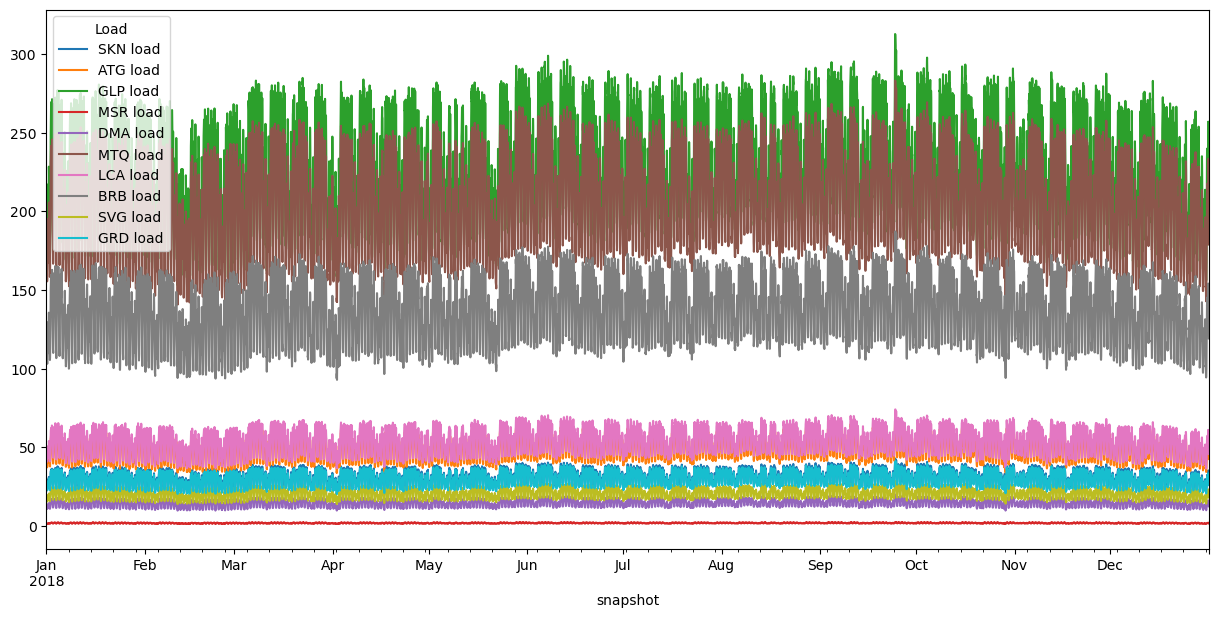

In [5]:
#print the load active power (P) consumption
network.loads_t.p.plot(figsize = (15,7))

name
SKN diesel           0.000000
SKN solar pv        68.243146
SKN wind            10.000000
SKN geothermal      23.020069
ATG diesel           0.000000
ATG wind            10.000000
ATG solar pv       282.961518
MSR diesel           0.000000
MSR geothermal       1.582476
MSR solar pv         3.364753
GLP diesel           0.000000
GLP coal            -0.000000
GLP hydro           15.000000
GLP geothermal      50.000000
GLP wind            50.000000
GLP solar pv      1236.683678
GLP biomass         10.000000
DMA diesel           0.000000
DMA hydro            6.600000
DMA wind            -0.000000
DMA solar pv        -0.000000
DMA geothermal      15.000000
MTQ diesel           0.000000
MTQ wind            50.000000
MTQ solar pv       877.216690
MTQ biomass         41.400000
MTQ geothermal      50.000000
LCA diesel           0.000000
LCA wind            10.000000
LCA solar pv       366.311895
LCA geothermal      30.000000
BRB diesel           0.000000
BRB solar pv       570.000000
BRB w

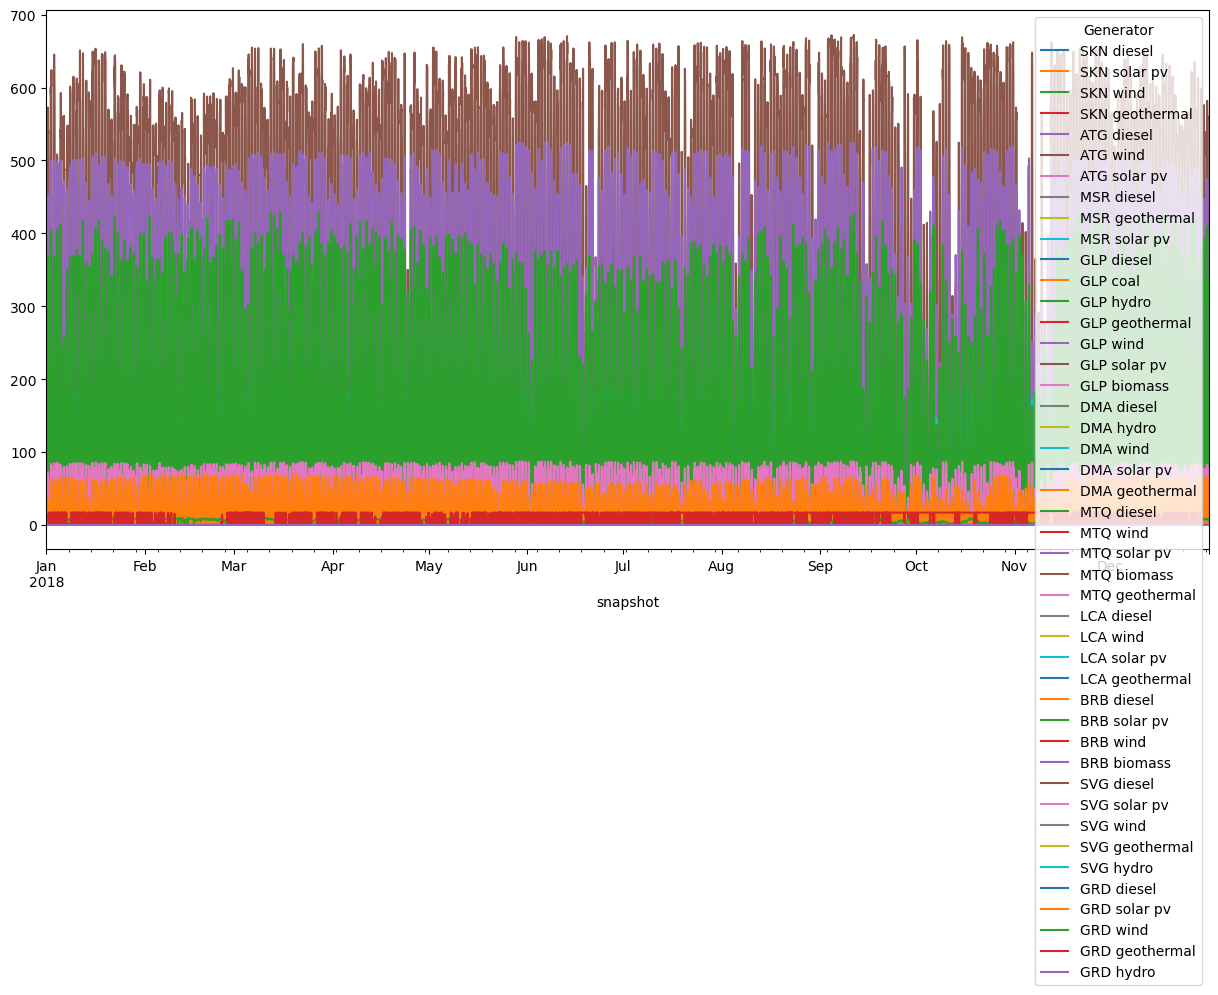

In [6]:
#print the generator active power (P) dispatch if desired and optimal capacities of generators
network.generators_t.p.plot(figsize = (15,7))
network.generators.p_nom_opt

In [7]:
#start manipulation of results for capacities
df_cap=pd.DataFrame(network.generators.p_nom_opt)
df_cap = df_cap.reset_index()

In [8]:
#reshape dataframe for output capacities
df_cap.columns = ['name','Capacity']
new = df_cap["name"].str.split(" ", n = 1, expand = True)
df_cap["Technology"]= new[1]
df_cap['Country']= new[0]
df_cap.drop(columns =["name"], inplace = True)
df_cap= df_cap.pivot(index = 'Country',columns = 'Technology', values = 'Capacity')
df_cap

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,0.0,NaN,NaN,282.961518,10.0
BRB,10.0,NaN,0.0,NaN,NaN,570.000000,10.0
DMA,NaN,NaN,0.0,15.000000,6.6,-0.000000,-0.0
GLP,10.0,-0.0,0.0,50.000000,15.0,1236.683678,50.0
GRD,NaN,NaN,0.0,16.852409,-0.0,88.645588,10.0
LCA,NaN,NaN,0.0,30.000000,NaN,366.311895,10.0
MSR,NaN,NaN,0.0,1.582476,NaN,3.364753,NaN
MTQ,41.4,NaN,0.0,50.000000,NaN,877.216690,50.0
SKN,NaN,NaN,0.0,23.020069,NaN,68.243146,10.0


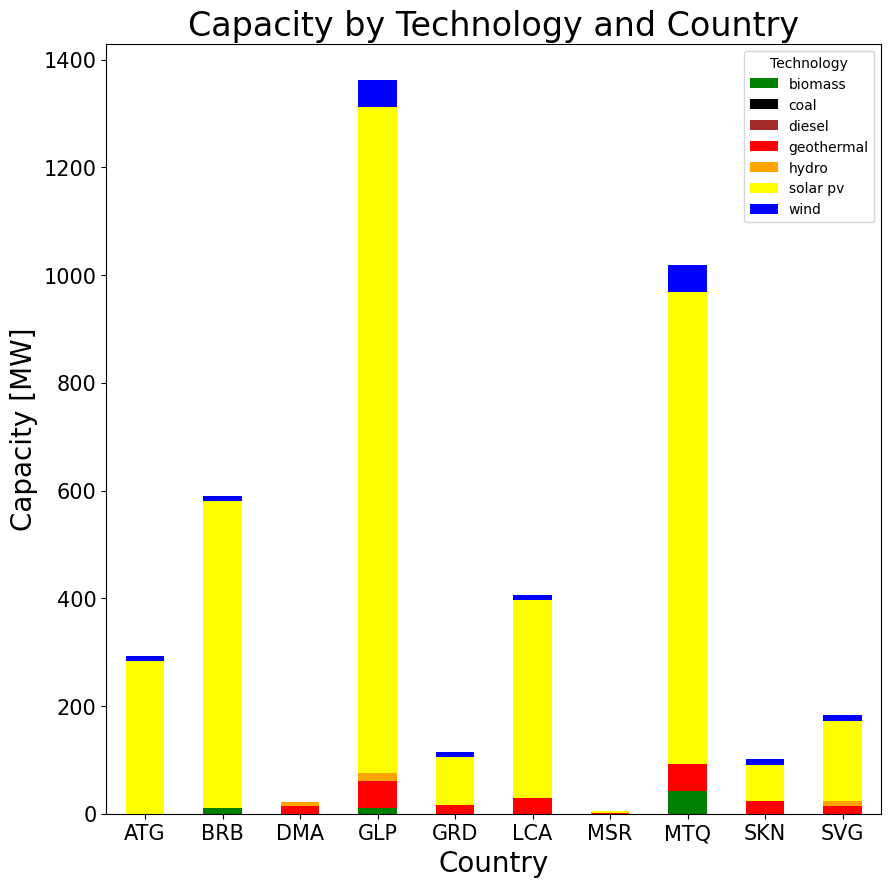

In [9]:
#plot capacity by country and technology
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_cap.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Capacity by Technology and Country",fontsize=24)
axs.set_ylabel("Capacity [MW]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20) 
fig.savefig(scenario+"capacity.png", bbox_inches='tight')  

In [10]:
#scale capacities to the maximum for each country
df_cap_scaled = df_cap.div(df_cap.sum(axis=1), axis=0)*100
df_cap_scaled

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,0.0,NaN,NaN,96.586582,3.413418
BRB,1.694915,NaN,0.0,NaN,NaN,96.610169,1.694915
DMA,NaN,NaN,0.0,69.444444,30.555556,-0.000000,-0.000000
GLP,0.734385,-0.0,0.0,3.671925,1.101577,90.820188,3.671925
GRD,NaN,NaN,0.0,14.591083,-0.000000,76.750758,8.658159
LCA,NaN,NaN,0.0,7.383490,NaN,90.155346,2.461163
MSR,NaN,NaN,0.0,31.987122,NaN,68.012878,NaN
MTQ,4.064336,NaN,0.0,4.908618,NaN,86.118429,4.908618
SKN,NaN,NaN,0.0,22.732904,NaN,67.391842,9.875254


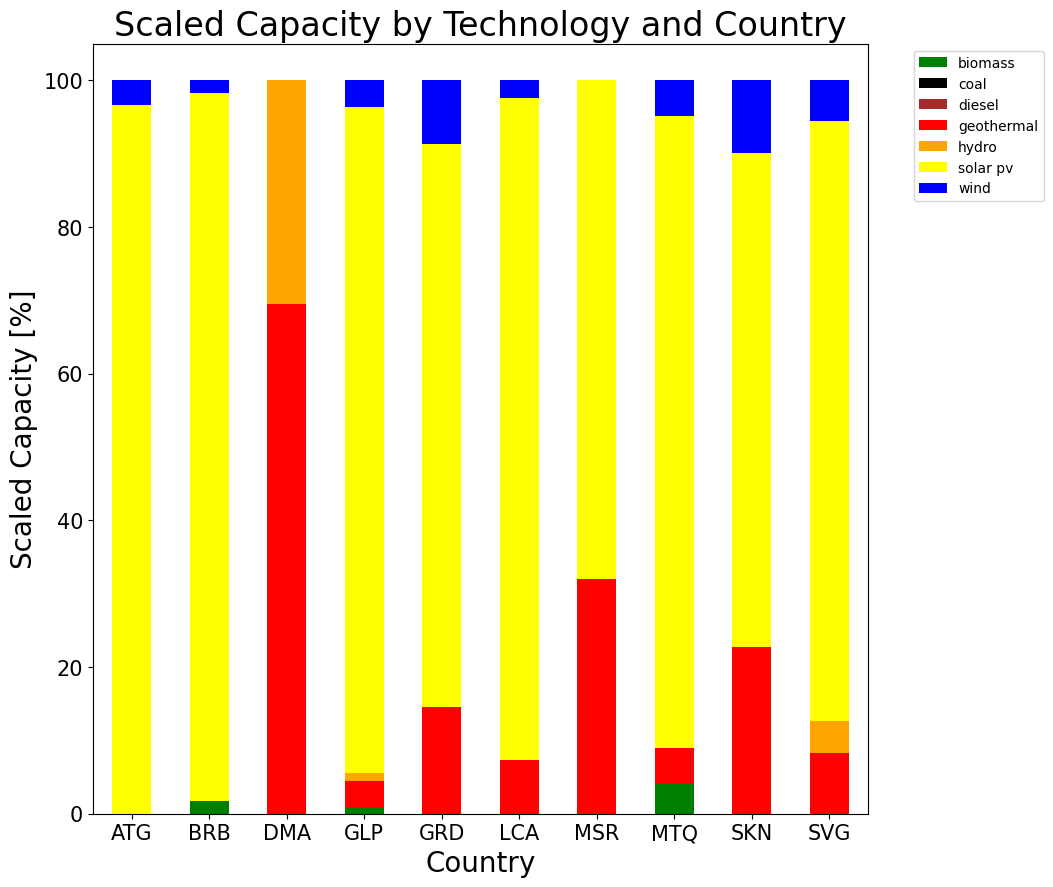

In [11]:
#plot scaled capacities by country and technology
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_cap_scaled.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Scaled Capacity by Technology and Country",fontsize=24)
axs.set_ylabel("Scaled Capacity [%]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20) 
axs.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.savefig(scenario+"scaled_capacity.png", bbox_inches='tight')

In [12]:
#optimum storage unit capacity [MW]
network.storage_units.p_nom_opt

name
SKN Storage     21.338031
ATG Storage     70.000000
MSR Storage      0.884288
GLP Storage    320.000000
DMA Storage     -0.000000
MTQ Storage    240.000000
LCA Storage     75.000000
BRB Storage    190.000000
SVG Storage     30.000000
GRD Storage     44.975253
Name: p_nom_opt, dtype: float64

In [13]:
#storage units energy capacity [MWh]
network.storage_units.p_nom_opt*network.storage_units.max_hours

name
SKN Storage     170.704245
ATG Storage     560.000000
MSR Storage       7.074301
GLP Storage    2560.000000
DMA Storage      -0.000000
MTQ Storage    1920.000000
LCA Storage     600.000000
BRB Storage    1520.000000
SVG Storage     240.000000
GRD Storage     359.802026
dtype: float64

In [14]:
#print the capacities of the links, including hydrogen electrolyzers and fuel cells
network.links.p_nom_opt

name
ATG GLP link        13.517847
SVG BRB link        25.000000
LCA BRB link        27.621592
ATG Electrolyzer    11.969850
ATG Fuel Cell       19.499384
BRB Electrolyzer    23.340777
BRB Fuel Cell       48.493749
GLP Electrolyzer    43.312951
GLP Fuel Cell       79.517727
MTQ Electrolyzer    17.707605
MTQ Fuel Cell       59.426447
LCA Electrolyzer    17.833092
LCA Fuel Cell       14.544550
SVG Electrolyzer     5.365450
SVG Fuel Cell        3.781110
GRD Electrolyzer     0.007583
GRD Fuel Cell        0.716697
SKN Electrolyzer     0.742305
SKN Fuel Cell        3.465837
MSR Electrolyzer     0.066609
MSR Fuel Cell        0.202552
DMA Electrolyzer    -0.000000
DMA Fuel Cell       -0.000000
Name: p_nom_opt, dtype: float64

In [15]:
#print capacities of the hydrogen storages
network.stores.e_nom_opt

name
ATG H2 Tank     3067.572608
BRB H2 Tank     7455.256271
GLP H2 Tank    11649.895300
MTQ H2 Tank     4265.611732
LCA H2 Tank     2024.314170
SKN H2 Tank      263.253158
SVG H2 Tank      576.039722
MSR H2 Tank       12.533919
GRD H2 Tank       45.151925
DMA H2 Tank       -0.000000
Name: e_nom_opt, dtype: float64

In [16]:
#print capital costs of the battery storage units
network.storage_units.capital_cost

name
SKN Storage    52145.00026
ATG Storage    52145.00026
MSR Storage    52145.00026
GLP Storage    52145.00026
DMA Storage    52145.00026
MTQ Storage    52145.00026
LCA Storage    52145.00026
BRB Storage    52145.00026
SVG Storage    52145.00026
GRD Storage    52145.00026
Name: capital_cost, dtype: float64

In [17]:
#calculate total storage cost by country
network.storage_units.p_nom_opt*network.storage_units.capital_cost

name
SKN Storage    1.112672e+06
ATG Storage    3.650150e+06
MSR Storage    4.611118e+04
GLP Storage    1.668640e+07
DMA Storage   -0.000000e+00
MTQ Storage    1.251480e+07
LCA Storage    3.910875e+06
BRB Storage    9.907550e+06
SVG Storage    1.564350e+06
GRD Storage    2.345235e+06
dtype: float64

In [18]:
(network.generators.p_nom_opt*network.generators.capital_cost).sum()

428005166.497293

In [19]:
(network.generators_t.p.sum()*network.generators.marginal_cost).sum()

20236680.19158841

In [20]:
#calculate total generation for the region
(network.generators_t.p.sum()).sum()

6976506.996152389

In [21]:
#sum up generator costs by country and technology
network.generators_t.p.sum()

Generator
SKN diesel        0.000000e+00
SKN solar pv      1.205172e+05
SKN wind          4.299935e+04
SKN geothermal    1.099416e+05
ATG diesel        0.000000e+00
ATG wind          3.918326e+04
ATG solar pv      3.992626e+05
MSR diesel        0.000000e+00
MSR geothermal    1.043403e+04
MSR solar pv      5.982670e+03
GLP diesel        0.000000e+00
GLP coal          0.000000e+00
GLP hydro         2.983405e+04
GLP geothermal    6.577930e+04
GLP wind          2.016310e+05
GLP solar pv      1.780183e+06
GLP biomass       8.031751e+03
DMA diesel        0.000000e+00
DMA hydro         5.781600e+04
DMA wind          0.000000e+00
DMA solar pv      0.000000e+00
DMA geothermal    6.966490e+04
MTQ diesel        0.000000e+00
MTQ wind          2.232961e+05
MTQ solar pv      1.389754e+06
MTQ biomass       3.065567e+04
MTQ geothermal    2.049261e+05
LCA diesel        0.000000e+00
LCA wind          4.423604e+04
LCA solar pv      5.091835e+05
LCA geothermal    5.465675e+04
BRB diesel        0.000000e+0

In [22]:
#reshape dataframe for storage costs by country 
df_storage_cost = pd.DataFrame(network.storage_units.p_nom_opt*network.storage_units.capital_cost)
df_storage_cost.columns = ['storage_cost']
df_storage_cost = df_storage_cost.reset_index()
df_storage_cost

,name,storage_cost
0,SKN Storage,1.112672e+06
1,ATG Storage,3.650150e+06
2,MSR Storage,4.611118e+04
3,GLP Storage,1.668640e+07
4,DMA Storage,-0.000000e+00
5,MTQ Storage,1.251480e+07
6,LCA Storage,3.910875e+06
7,BRB Storage,9.907550e+06
8,SVG Storage,1.564350e+06
9,GRD Storage,2.345235e+06


In [23]:
#reshape storage costs dataframe
new = df_storage_cost["name"].str.split(" ", n = 1, expand = True)
df_storage_cost["Tech"]= new[1]
df_storage_cost['Country']= new[0]
df_storage_cost.drop(columns =["name"], inplace = True)
df_storage_cost= df_storage_cost.pivot(index = 'Country',columns = 'Tech', values = 'storage_cost')
df_storage_cost 

Tech,Storage
Country,
ATG,3.650150e+06
BRB,9.907550e+06
DMA,-0.000000e+00
GLP,1.668640e+07
GRD,2.345235e+06
LCA,3.910875e+06
MSR,4.611118e+04
MTQ,1.251480e+07
SKN,1.112672e+06


In [24]:
#reshape dataframe for hydrogen tank storage costs by country 
df_hydrogen_storage_cost = pd.DataFrame(network.stores.e_nom_opt*network.stores.capital_cost)
df_hydrogen_storage_cost.columns = ['tank_cost']
df_hydrogen_storage_cost = df_hydrogen_storage_cost.reset_index()
#df_hydrogen_storage_cost
new2 = df_hydrogen_storage_cost["name"].str.split(" ", n = 1, expand = True)
df_hydrogen_storage_cost["Tech"]= new2[1]
df_hydrogen_storage_cost['Country']= new2[0]
#df_hydrogen_storage_cost
df_hydrogen_storage_cost.drop(columns =["name"], inplace = True)
df_hydrogen_storage_cost= df_hydrogen_storage_cost.pivot(index = 'Country',columns = 'Tech', values = 'tank_cost')
#df_hydrogen_storage_cost
#reshape dataframe for hydrogen electrolyzer and fuel cell costs by country 
df_hydrogen_techs_cost = pd.DataFrame(network.links.p_nom_opt*network.links.capital_cost)
df_hydrogen_techs_cost.columns = ['tank_cost']
df_hydrogen_techs_cost = df_hydrogen_techs_cost.reset_index()
#df_hydrogen_techs_cost
#reshape hydrogen electrolyzer and fuel cell costs dataframe
new3 = df_hydrogen_techs_cost["name"].str.split(" ", n = 1, expand = True)
df_hydrogen_techs_cost["Tech"]= new3[1]
df_hydrogen_techs_cost['Country']= new3[0]
#df_hydrogen_storage_cost
df_hydrogen_techs_cost.drop(columns =["name"], inplace = True)
df_hydrogen_techs_cost= df_hydrogen_techs_cost.pivot(index = 'Country',columns = 'Tech', values = 'tank_cost')
#df_hydrogen_techs_cost


In [25]:
#reshape dataframe for generator costs
df_cost=pd.DataFrame((network.generators.p_nom_opt*network.generators.capital_cost)+(network.generators_t.p.sum()*network.generators.marginal_cost))
df_cost.columns = ['generator_cost']
df_cost = df_cost.reset_index()
#df_cost

In [26]:
#reshape dataframe for generator and storage costs
new1 = df_cost["name"].str.split(" ", n = 1, expand = True)
df_cost["Technology"]= new1[1]
df_cost['Country']= new1[0]
df_cost.drop(columns =["name"], inplace = True)
df_cost = df_cost.pivot(index = 'Country',columns = 'Technology', values = 'generator_cost')
#extracted_col = pd.DataFrame(df_storage_cost['storage_cost'])
#extracted_col
df_cost = df_cost.join(df_storage_cost['Storage'])
df_cost = df_cost.join(df_hydrogen_storage_cost['H2 Tank'])
df_cost = df_cost.join(df_hydrogen_techs_cost['Electrolyzer'])
df_cost = df_cost.join(df_hydrogen_techs_cost['Fuel Cell'])
df_cost


,biomass,coal,diesel,geothermal,hydro,solar pv,wind,Storage,H2 Tank,Electrolyzer,Fuel Cell
Country,,,,,,,,,,,
ATG,NaN,NaN,0.0,NaN,NaN,2.144056e+07,1162760.0,3.650150e+06,5.475617e+06,1.017437e+06,8.287238e+05
BRB,6.310924e+06,NaN,0.0,NaN,NaN,4.319004e+07,1162760.0,9.907550e+06,1.330763e+07,1.983966e+06,2.060984e+06
DMA,NaN,NaN,0.0,8.793548e+06,1.637249e+06,0.000000e+00,0.0,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
GLP,5.884445e+06,0.0,0.0,2.598309e+07,2.705360e+06,9.370600e+07,5813800.0,1.668640e+07,2.079506e+07,3.681601e+06,3.379503e+06
GRD,NaN,NaN,0.0,9.586772e+06,0.000000e+00,6.716853e+06,1162760.0,2.345235e+06,8.059619e+04,6.445725e+02,3.045963e+04
LCA,NaN,NaN,0.0,1.589363e+07,NaN,2.775618e+07,1162760.0,3.910875e+06,3.613401e+06,1.515813e+06,6.181434e+05
MSR,NaN,NaN,0.0,9.893954e+05,NaN,2.549541e+05,NaN,4.611118e+04,2.237305e+04,5.661746e+03,8.608459e+03
MTQ,2.399819e+07,NaN,0.0,2.876602e+07,NaN,6.646846e+07,5813800.0,1.251480e+07,7.614117e+06,1.505146e+06,2.525624e+06
SKN,NaN,NaN,0.0,1.355578e+07,NaN,5.170920e+06,1162760.0,1.112672e+06,4.699069e+05,6.309590e+04,1.472981e+05


In [27]:
#reshape dataframe for actual generation by country and technology (in GWh)
df_gen=pd.DataFrame(network.generators_t.p.sum()/1000)
df_gen = df_gen.reset_index()
df_gen.columns = ['name','Electricity']
new = df_gen["name"].str.split(" ", n = 1, expand = True)
df_gen["Technology"]= new[1]
df_gen['Country']= new[0]
df_gen.drop(columns =["name"], inplace = True)
df_gen= df_gen.pivot(index = 'Country',columns = 'Technology', values = 'Electricity')
df_gen

Technology,biomass,coal,diesel,geothermal,hydro,solar pv,wind
Country,,,,,,,
ATG,NaN,NaN,0.0,NaN,NaN,399.262622,39.183263
BRB,11.078026,NaN,0.0,NaN,NaN,952.474535,46.307643
DMA,NaN,NaN,0.0,69.664900,57.816000,0.000000,0.000000
GLP,8.031751,0.0,0.0,65.779296,29.834045,1780.183098,201.630963
GRD,NaN,NaN,0.0,63.631808,0.000000,152.167649,48.256905
LCA,NaN,NaN,0.0,54.656747,NaN,509.183505,44.236042
MSR,NaN,NaN,0.0,10.434034,NaN,5.982670,NaN
MTQ,30.655668,NaN,0.0,204.926065,NaN,1389.754241,223.296114
SKN,NaN,NaN,0.0,109.941606,NaN,120.517167,42.999351


In [28]:
#reshape link costs dataframe
df_link_cost = pd.DataFrame(network.links.p_nom_opt*network.links.capital_cost)
df_link_cost.columns = ['link_cost']
df_link_cost = df_link_cost.reset_index()
df_link_cost

,name,link_cost
0,ATG GLP link,1.173749e+06
1,SVG BRB link,4.011150e+06
2,LCA BRB link,3.910389e+06
3,ATG Electrolyzer,1.017437e+06
4,ATG Fuel Cell,8.287238e+05
5,BRB Electrolyzer,1.983966e+06
6,BRB Fuel Cell,2.060984e+06
7,GLP Electrolyzer,3.681601e+06
8,GLP Fuel Cell,3.379503e+06
9,MTQ Electrolyzer,1.505146e+06


In [29]:
#calculate total link costs
df_link_cost.link_cost.sum()

29084759.128449343

In [30]:
#calculate LCOE for each country separately
df_cost.sum(axis=1)/df_gen.sum(axis=1)/1000

Country
ATG    76.577862
BRB    77.163013
DMA    81.822428
GLP    85.657518
GRD    75.451015
LCA    89.578911
MSR    80.838639
MTQ    80.711660
SKN    79.289782
SVG    82.730282
dtype: float64

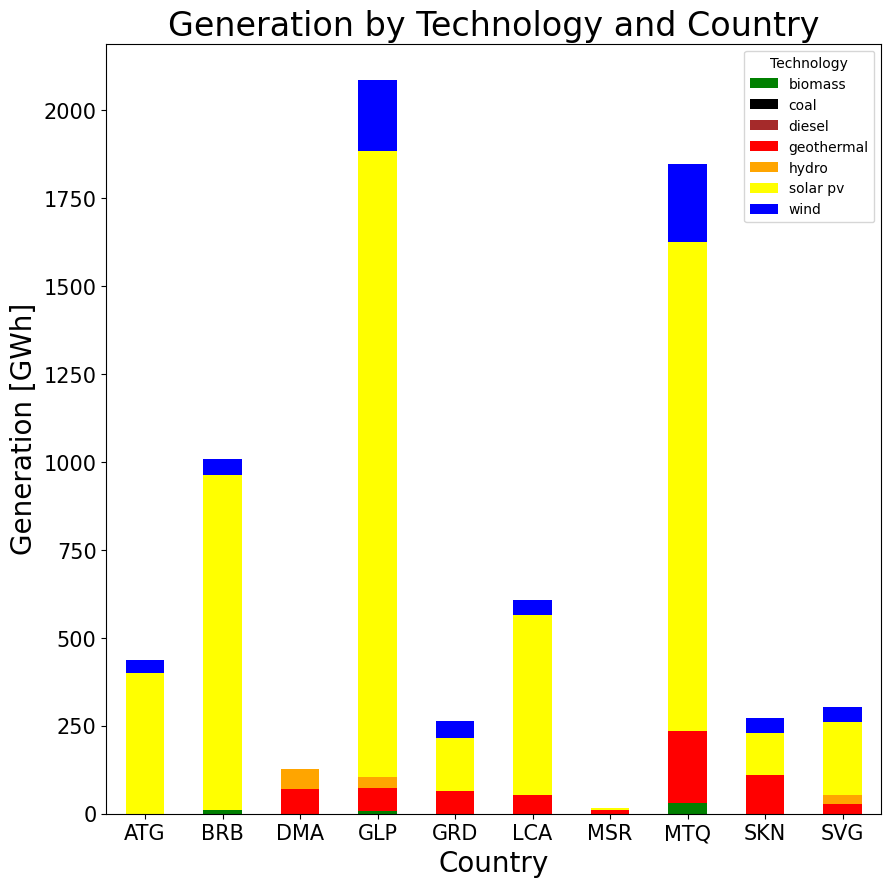

In [31]:
#plot the actual generation by country and technology [GWh]
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_gen.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Generation by Technology and Country",fontsize=24)
axs.set_ylabel("Generation [GWh]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20) 
fig.savefig(scenario+"generation.png", bbox_inches='tight') 

In [32]:
#scaled the generation output by country and technology
df_gen_scaled = df_gen.div(df_gen.sum(axis=1), axis=0)*100

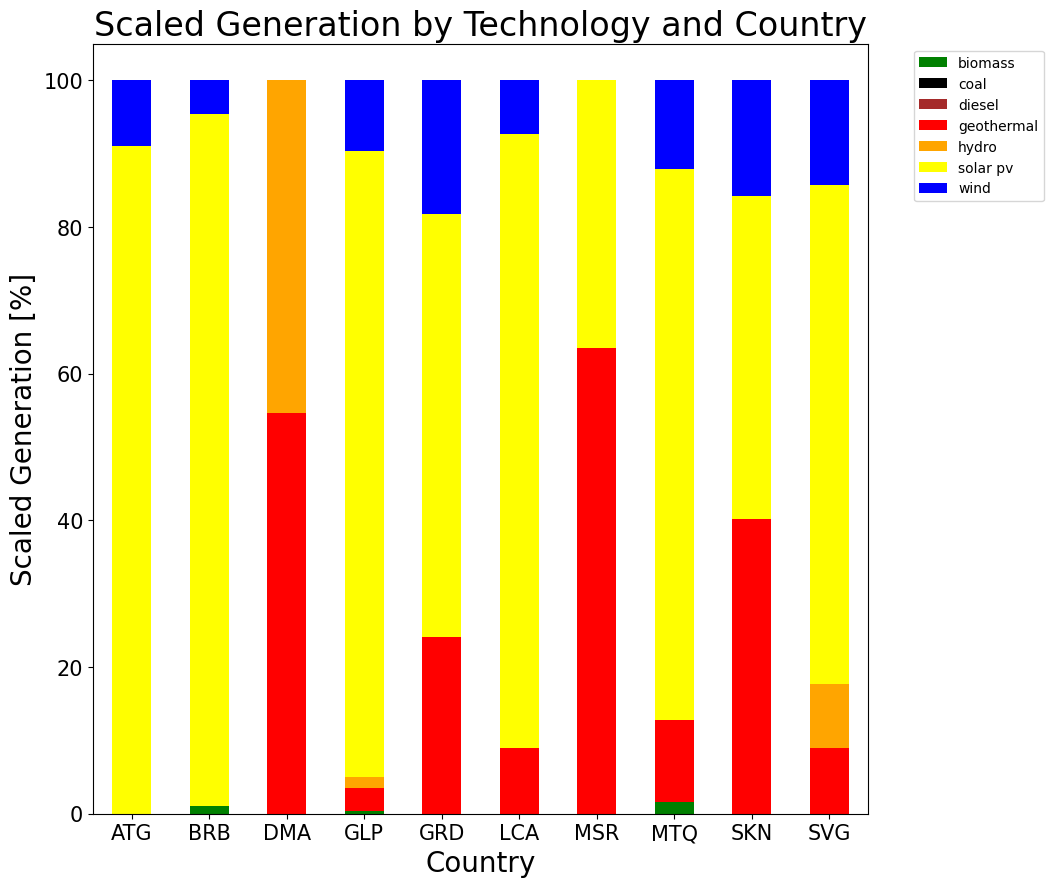

In [33]:
#plot the scaled output by technology and country
fig, axs = plt.subplots(figsize=(10, 10))        # Create an empty Matplotlib Figure and Axes
df_gen_scaled.plot(ax = axs,kind = 'bar', color=['green','black', 'brown', 'red', 'orange','yellow', 'blue'], rot=0,stacked = True)                  # Use pandas to put the area plot on the prepared Figure/Axes
axs.tick_params(axis='both', which='major', labelsize=15)
axs.set_title("Scaled Generation by Technology and Country",fontsize=24)
axs.set_ylabel("Scaled Generation [%]",fontsize=20)          # Do any Matplotlib customization you like
axs.set_xlabel("Country",fontsize=20) 
axs.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.savefig(scenario+"scaled_generation.png", bbox_inches='tight') 

In [34]:
#network.generators_t.p.sum()/(network.generators_t.p.sum()).sum()

In [35]:
#calculate capacity factors by country and technology
network.generators_t.p.sum()/(network.generators.p_nom_opt*8760)

Generator
SKN diesel             NaN
SKN solar pv      0.201598
SKN wind          0.490860
SKN geothermal    0.545194
ATG diesel             NaN
ATG wind          0.447298
ATG solar pv      0.161075
MSR diesel             NaN
MSR geothermal    0.752681
MSR solar pv      0.202973
GLP diesel             NaN
GLP coal               NaN
GLP hydro         0.227048
GLP geothermal    0.150181
GLP wind          0.460345
GLP solar pv      0.164324
GLP biomass       0.091687
DMA diesel             NaN
DMA hydro         1.000000
DMA wind               NaN
DMA solar pv           NaN
DMA geothermal    0.530174
MTQ diesel             NaN
MTQ wind          0.509808
MTQ solar pv      0.180854
MTQ biomass       0.084529
MTQ geothermal    0.467868
LCA diesel             NaN
LCA wind          0.504978
LCA solar pv      0.158679
LCA geothermal    0.207978
BRB diesel             NaN
BRB solar pv      0.190754
BRB wind          0.528626
BRB biomass       0.126461
SVG diesel             NaN
SVG solar pv      

In [36]:
#calculate regional LCOE
((network.generators.p_nom_opt*network.generators.capital_cost).sum()+(network.generators_t.p.sum()*network.generators.marginal_cost).sum()+(network.storage_units.p_nom_opt*network.storage_units.capital_cost).sum()+(network.stores.e_nom_opt*network.stores.capital_cost).sum()+(network.links.p_nom_opt*network.links.capital_cost).sum()).sum()/(network.loads_t.p_set.sum()).sum()

85.51292369818255

<Axes: xlabel='snapshot'>

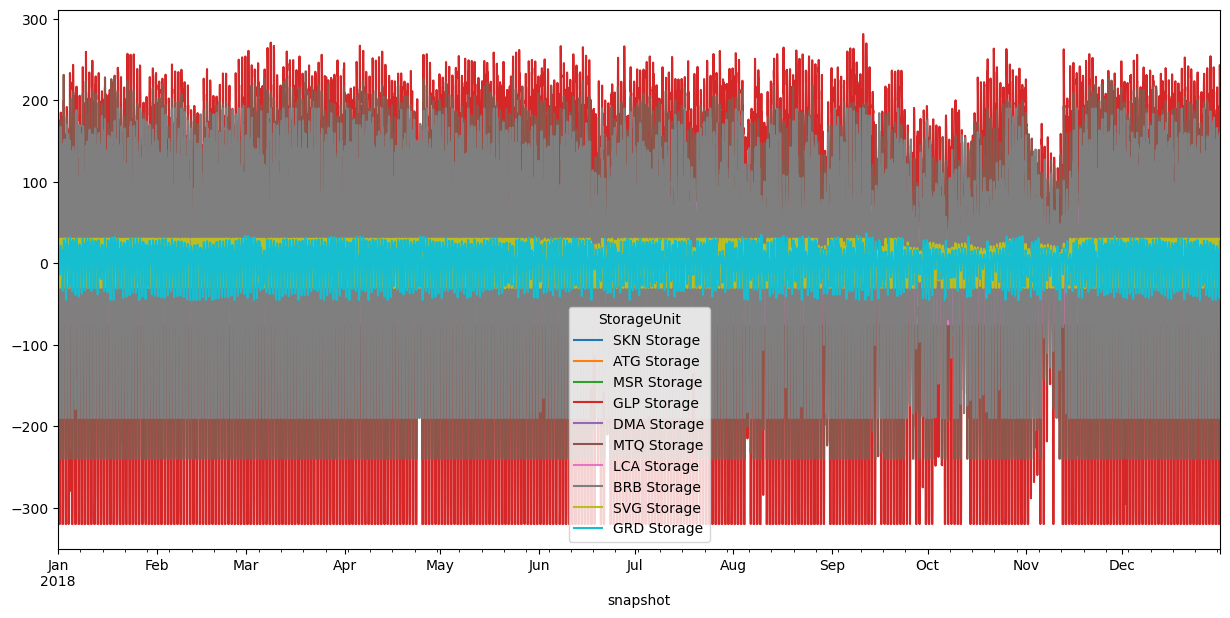

In [37]:
#print storage units
network.storage_units_t.p.plot(figsize = (15,7))

